# Installs and Data


## Packages and Libraries

In [ ]:
!pip install tensorflow==2.10 keras==2.10
!pip install pennylane
!pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.0/578.0 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 23.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  At

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 66.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.0/930.0 kB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 67.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 69.3 MB/s eta 0:00:00


In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# Classifier Libraries
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pennylane as qml
from pennylane import numpy as np
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dropout

from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

from sklearn.preprocessing import StandardScaler

## Functions

In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd

from imblearn.over_sampling import SMOTE
import pandas as pd

def balance_with_smote(df, target_col='Class', smote_ratio=0.2, random_state=42):
    """Apply SMOTE to increase the minority class size by a specified ratio."""
    X = df.drop(columns=[target_col])
    y = df[target_col]

    smote = SMOTE(sampling_strategy=smote_ratio, random_state=random_state)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    balanced_df = pd.DataFrame(X_resampled, columns=X.columns)
    balanced_df[target_col] = y_resampled
    return balanced_df

In [ ]:
def count_fraud_percentage(df, fraud_col='targets'):
    """
    Calculate the count and percentage of fraud cases in a DataFrame.

    """

    fraud_count = df[fraud_col].sum()

    total_count = len(df)
    fraud_percentage = (fraud_count / total_count) * 100

    return fraud_count, fraud_percentage

## Data Loading

We use the kaggle interface to download the datasets directly into our Google Colab Notebook. For that you need to have downloaded your
kaggle.json file that can be found through your kaggle account.

For more information about how to download the dataset please check the ReadMe file

In the "Choose Files" go to your desktop files and upload the kaggle.json file

In [ ]:
files.upload()

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d volodymyrgavrysh/fraud-detection-bank-dataset-20k-records-binary -p /content/datasets --unzip

print("Dataset downloaded to: /content/datasets")

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/volodymyrgavrysh/fraud-detection-bank-dataset-20k-records-binary
License(s): CC0-1.0
  0% 0.00/738k [00:00<?, ?B/s]
100% 738k/738k [00:00<00:00, 81.3MB/s]
Dataset downloaded to: /content/datasets


In [ ]:
finance_df=pd.read_csv("/content/datasets/fraud_detection_bank_dataset.csv",delimiter=',')
finance_df.head()

,Unnamed: 0,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
0,0,9,1354,0,18,0,1,7,9,0,...,0,0,0,1,1,0,0,0,49,1
1,1,0,239,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,55,1
2,2,0,260,0,4,0,3,6,0,0,...,0,0,0,1,1,0,0,0,56,1
3,3,17,682,0,1,0,0,8,17,0,...,0,1,0,1,1,0,0,0,65,1
4,4,1,540,0,2,0,1,7,1,0,...,0,0,0,1,1,0,0,0,175,1


In [ ]:
df=finance_df
df

,Unnamed: 0,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
0,0,9,1354,0,18,0,1,7,9,0,...,0,0,0,1,1,0,0,0,49,1
1,1,0,239,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,55,1
2,2,0,260,0,4,0,3,6,0,0,...,0,0,0,1,1,0,0,0,56,1
3,3,17,682,0,1,0,0,8,17,0,...,0,1,0,1,1,0,0,0,65,1
4,4,1,540,0,2,0,1,7,1,0,...,0,0,0,1,1,0,0,0,175,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20463,20463,0,88,0,0,0,2,-1,0,0,...,0,1,0,0,0,0,1,0,85,0
20464,20464,0,134,0,2,0,0,6,0,0,...,0,0,0,0,0,0,0,0,7,0
20465,20465,4,393,1,1,0,0,-1,4,0,...,0,1,0,0,0,0,0,0,45,0
20466,20466,0,10,0,1,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,5,0


In [ ]:
fraud_id = finance_df.targets[finance_df.targets.eq(1)].index
nofraud_id = finance_df.targets[finance_df.targets.eq(0)].index

In [ ]:
print(fraud_id.shape, nofraud_id.shape)

(5438,) (15030,)


In [ ]:
y = df['targets']
X = df.drop(columns=['targets'])

In [ ]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [ ]:
y.value_counts()

,count
targets,
0,15030
1,5438


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Split temp into validation and test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
X_train.shape

(12280, 113)

In [ ]:
y_train.value_counts()

,count
targets,
0,8996
1,3284


## Federation of Data

At this stage we want to split the data into different clients.

We are gonna use 20 different clients and each of them has to get a correct amount of data that will have the same ratio of Fraud/Non-Fraud with the original dataset.




Our base Dataset is the following:

In [ ]:
print(finance_df.head())
print(finance_df.shape)
print("We have ",fraud_id.shape," fraud cases and ", nofraud_id.shape, " non-fraud cases")

   Unnamed: 0  col_0  col_1  col_2  col_3  col_4  col_5  col_6  col_7  col_8  \
0           0      9   1354      0     18      0      1      7      9      0   
1           1      0    239      0      1      0      1      0      0      0   
2           2      0    260      0      4      0      3      6      0      0   
3           3     17    682      0      1      0      0      8     17      0   
4           4      1    540      0      2      0      1      7      1      0   

   ...  col_103  col_104  col_105  col_106  col_107  col_108  col_109  \
0  ...        0        0        0        1        1        0        0   
1  ...        0        1        0        0        0        0        0   
2  ...        0        0        0        1        1        0        0   
3  ...        0        1        0        1        1        0        0   
4  ...        0        0        0        1        1        0        0   

   col_110  col_111  targets  
0        0       49        1  
1        0       5

Now we are going to check the ratio between these two classes that we need to sustainduring the data split

In [ ]:
fraud_count = fraud_id.shape[0]
non_fraud_count = nofraud_id.shape[0]

ratio = non_fraud_count / fraud_count
print(f"The ratio of non-fraud to fraud cases is: {ratio}")

The ratio of non-fraud to fraud cases is: 2.7638837808017653


SO we have to sustain a 2.763 ratio of fraud/non fraud between the datasets.

In [ ]:
# prompt: I want to split the finance_df into 10 clients but also sustain the ratio of fraud/non-fraud the same (2.763) check previous commands to understand more

def split_data_with_ratio(df, num_clients, target_col='targets', ratio=2.763):
    """Splits the dataframe into 'num_clients' while preserving the specified ratio of the target column."""

    fraud_indices = df[df[target_col] == 1].index
    non_fraud_indices = df[df[target_col] == 0].index

    fraud_per_client = len(fraud_indices) // num_clients
    non_fraud_per_client = int(fraud_per_client * ratio)

    client_dfs = []
    start_fraud = 0
    start_non_fraud = 0

    for _ in range(num_clients):
        end_fraud = min(start_fraud + fraud_per_client, len(fraud_indices))
        end_non_fraud = min(start_non_fraud + non_fraud_per_client, len(non_fraud_indices))

        client_indices = list(fraud_indices[start_fraud:end_fraud]) + list(non_fraud_indices[start_non_fraud:end_non_fraud])
        client_df = df.loc[client_indices]

        client_dfs.append(client_df)
        start_fraud = end_fraud
        start_non_fraud = end_non_fraud

    # Handle any remaining data points
    remaining_indices = list(fraud_indices[start_fraud:]) + list(non_fraud_indices[start_non_fraud:])

    if remaining_indices:
        # Distribute remaining datapoints among the existing clients
      for i, index in enumerate(remaining_indices):
          client_dfs[i % len(client_dfs)] = pd.concat([client_dfs[i % len(client_dfs)], df.loc[[index]]])

    return client_dfs

Client 1: Fraud Count = 544, Non-Fraud Count = 1503, Ratio = 2.7628676470588234
Client 2: Fraud Count = 544, Non-Fraud Count = 1503, Ratio = 2.7628676470588234
Client 3: Fraud Count = 544, Non-Fraud Count = 1503, Ratio = 2.7628676470588234
Client 4: Fraud Count = 544, Non-Fraud Count = 1503, Ratio = 2.7628676470588234
Client 5: Fraud Count = 544, Non-Fraud Count = 1503, Ratio = 2.7628676470588234
Client 6: Fraud Count = 544, Non-Fraud Count = 1503, Ratio = 2.7628676470588234
Client 7: Fraud Count = 544, Non-Fraud Count = 1503, Ratio = 2.7628676470588234
Client 8: Fraud Count = 544, Non-Fraud Count = 1503, Ratio = 2.7628676470588234
Client 9: Fraud Count = 543, Non-Fraud Count = 1503, Ratio = 2.7679558011049723
Client 10: Fraud Count = 543, Non-Fraud Count = 1503, Ratio = 2.7679558011049723


In [ ]:
# Split the dataframe into 10 clients
client_dataframes = split_data_with_ratio(finance_df, 10)

# Verify the split (optional)
for i, client_df in enumerate(client_dataframes):
    fraud_count, fraud_percentage = count_fraud_percentage(client_df)
    non_fraud_count = len(client_df) - fraud_count
    current_ratio = non_fraud_count / fraud_count
    print(f"Client {i+1}: Fraud Count = {fraud_count}, Non-Fraud Count = {non_fraud_count}, Ratio = {current_ratio}")

In [ ]:
client_dataframes

[       Unnamed: 0  col_0  col_1  col_2  col_3  col_4  col_5  col_6  col_7  \
 0               0      9   1354      0     18      0      1      7      9   
 1               1      0    239      0      1      0      1      0      0   
 2               2      0    260      0      4      0      3      6      0   
 3               3     17    682      0      1      0      0      8     17   
 4               4      1    540      0      2      0      1      7      1   
 ...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
 6937         6937      1     94      0      1      0      0      7      1   
 5430         5430      0     62      0      0      0      1      7      0   
 20440       20440      0     10      0      1      0      0      6      0   
 20450       20450      0     27      0      0      0      1      0      0   
 20460       20460      0    281      0      0      0      1      7      0   
 
        col_8  ...  col_103  col_104  col_105  col_106  col_10

# Model Architecture

From the previous work done on Quantum Neural Networks we have concluded that the best and most stable model to be used is a Quantum Hyrbrid

First we need to establish the Quantum circuit that we will use. The one that has been chosen is the qnode_long which has a total of 32 weights.

The Quantum Circuit used was established in the paper:

QFNN-FFD: Quantum Federated Neural Network for Financial Fraud Detection

https://arxiv.org/abs/2404.02595

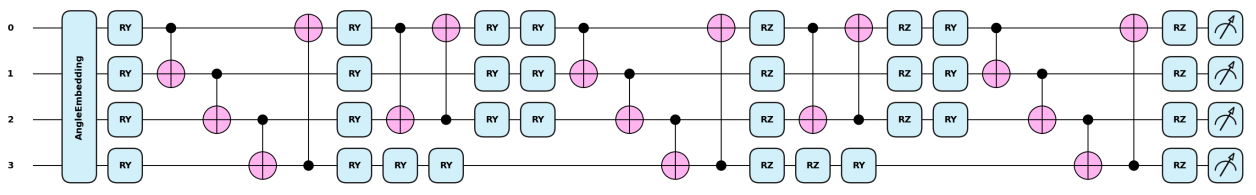

In [ ]:
import pennylane as qml
import numpy as np

n_qubits = 3
dev = qml.device("default.qubit", wires=n_qubits+1)

from itertools import combinations

In [ ]:
def custom_layer_long(weights, n_qubits):
    index = 0  # Start index for weights

    # First block of RY
    for i in range(n_qubits + 1):
        qml.RY(weights[index], wires=i)
        index += 1

    # First set of CNOT pairs
    pairs = [(0, 1), (1, 2), (2, 3), (3, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # Second block of RY
    for i in range(n_qubits + 1):
        qml.RY(weights[index], wires=i)
        index += 1

    # Second set of CNOT pairs
    pairs = [(0, 2), (2, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # Third block of RY (single qubit repeated)
    qml.RY(weights[index], wires=3)
    index += 1
    qml.RY(weights[index], wires=3)
    index += 1

    # Nested loop of RY
    for j in range(2):
        for i in range(n_qubits):
            qml.RY(weights[index], wires=i)
            index += 1

    # Third set of CNOT pairs
    pairs = [(0, 1), (1, 2), (2, 3), (3, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # First block of RZ
    for i in range(n_qubits + 1):
        qml.RZ(weights[index], wires=i)
        index += 1

    # Fourth set of CNOT pairs
    pairs = [(0, 2), (2, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # Fourth block of RY (single qubit repeated)
    qml.RY(weights[index], wires=3)
    index += 1
    qml.RY(weights[index], wires=3)
    index += 1

    # Second block of RZ
    for i in range(n_qubits):
        qml.RZ(weights[index], wires=i)
        index += 1

    # Third block of RY
    for i in range(n_qubits):
        qml.RY(weights[index], wires=i)
        index += 1

    # Fifth set of CNOT pairs
    pairs = [(0, 1), (1, 2), (2, 3), (3, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # Final block of RZ
    for i in range(n_qubits + 1):
        qml.RZ(weights[index], wires=i)
        index += 1

    return index

In [ ]:
@qml.qnode(dev)
def qnode_long(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits+1))
    # print("AAAAAAAAAAAAAAAAAAAAA")
    # i=0
    for w in weights:
        # print(i)
        custom_layer_long(w,n_qubits)
        # i+=1
    outputs = [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]
    return outputs

In [ ]:
n_layers = 1
n_qubits=3
total_weights_long = 32

In [ ]:
print("Total weights required:", total_weights_long)

weight_shapes_long = {"weights": (n_layers, total_weights_long+1)}

Total weights required: 32


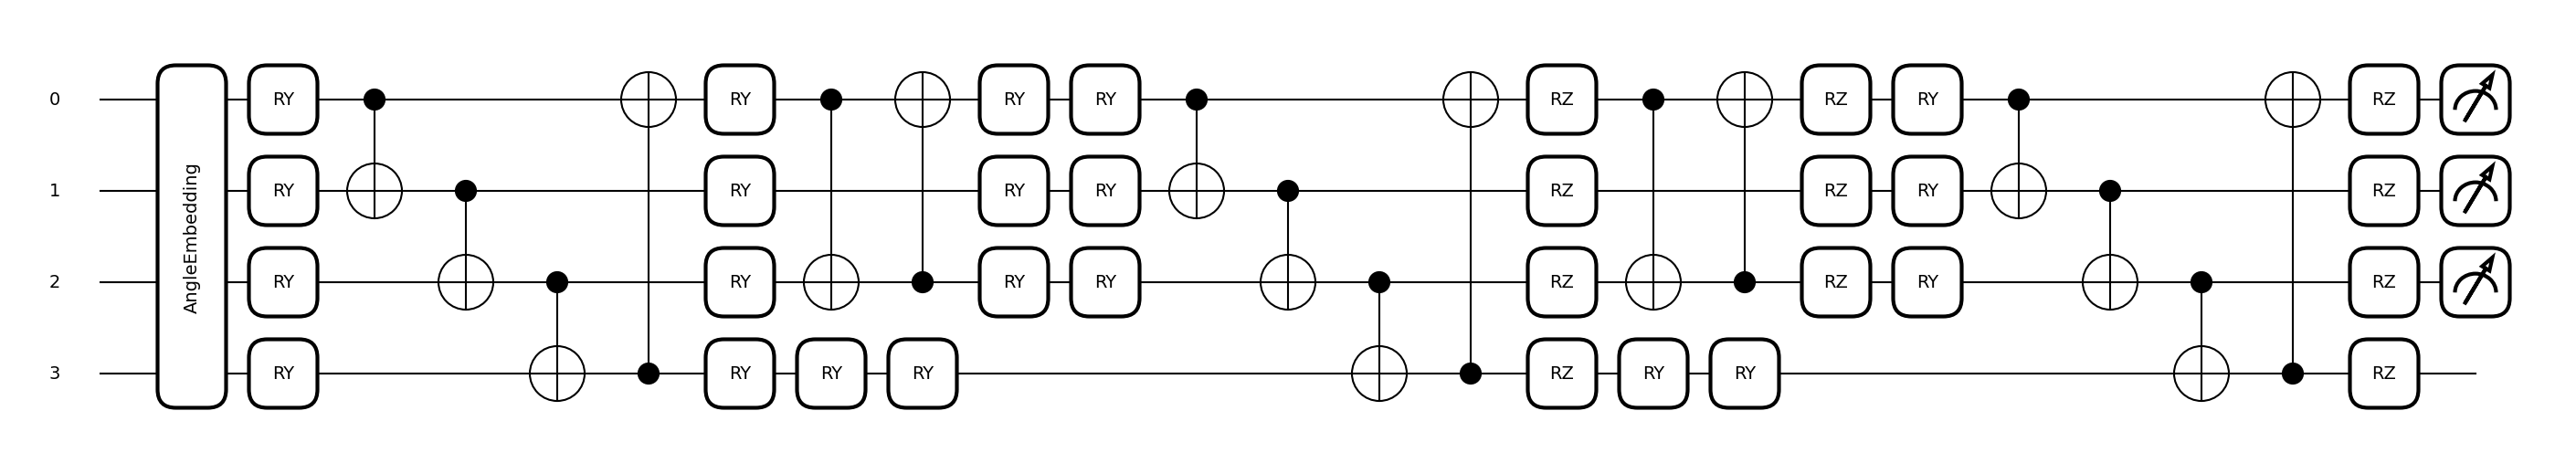

In [ ]:
# Your existing code to define qnode, X, and weights goes here
weights = np.random.random(size=(n_layers, total_weights_long))
# Use draw_mpl to generate a graphical representation
fig, ax = qml.draw_mpl(qnode_long)(X[:, :4], weights)

plt.show()

In [ ]:
qlayer_long = qml.qnn.KerasLayer(qnode_long, weight_shapes_long, output_dim=n_qubits)

# Evaluating Functions

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

def evaluate_model(model, X_test, y_test):

    y_pred = np.argmax(model.predict(X_test), axis=-1)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # Compute classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))


### Model

In [ ]:
n_inputs = X_train.shape[1]

quantum_model = Sequential([
    Dense(4, activation=tf.nn.relu),
    # qlayer_long,
    Dense(2, activation=tf.nn.softmax)
])

quantum_model.compile(optimizer=Adam(lr=0.01),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

quantum_model.fit(X_train, y_train, validation_split=0.2,batch_size=25,epochs=5,shuffle=True,verbose=2)

/usr/local/lib/python3.10/dist-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
393/393 - 2s - loss: 0.3804 - accuracy: 0.8355 - val_loss: 0.2125 - val_accuracy: 0.9349 - 2s/epoch - 5ms/step
Epoch 2/5
393/393 - 1s - loss: 0.1588 - accuracy: 0.9535 - val_loss: 0.1236 - val_accuracy: 0.9654 - 730ms/epoch - 2ms/step
Epoch 3/5
393/393 - 1s - loss: 0.1005 - accuracy: 0.9699 - val_loss: 0.0892 - val_accuracy: 0.9723 - 641ms/epoch - 2ms/step
Epoch 4/5
393/393 - 1s - loss: 0.0740 - accuracy: 0.9784 - val_loss: 0.0706 - val_accuracy: 0.9772 - 675ms/epoch - 2ms/step
Epoch 5/5
393/393 - 1s - loss: 0.0588 - accuracy: 0.9832 - val_loss: 0.0600 - val_accuracy: 0.9821 - 656ms/epoch - 2ms/step


In [ ]:
evaluate_model(quantum_model, X_test, y_test)

128/128 [==============================] - 0s 1ms/step
Confusion Matrix:
[[2991   32]
 [  34 1037]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3023
           1       0.97      0.97      0.97      1071

    accuracy                           0.98      4094
   macro avg       0.98      0.98      0.98      4094
weighted avg       0.98      0.98      0.98      4094

